In [54]:
import pandas as pd
Scores=pd.read_csv('Scores_Engineering_2021.csv')
Data=pd.read_csv('Data_Engineering_2021.csv')

In [55]:
Data.head()

,Name,UG Intake,PG Intake,N_T,Faculty,Full Time,Part Time,UG Enrolled,PG Enrolled
0,Indian Institute of Technology Madras,3813,1573,5386,642,2112,39,3935,1914
1,Indian Institute of Technology Delhi,3772,2214,5986,667,2349,570,3988,2177
2,Indian Institute of Technology Bombay,3744,1543,5287,592,1879,308,4179,1738
3,Indian Institute of Technology Kanpur,3471,1895,5366,481,1742,26,3507,1759
4,Indian Institute of Technology Kharagpur,2773,5946,8719,794,2963,0,2519,6160


In [56]:
len(Scores)

198

In [57]:
len(Data)

200

In [58]:
df=pd.merge(Data,Scores,on="Name")
df.head()


,Name,UG Intake,PG Intake,N_T,Faculty,Full Time,Part Time,UG Enrolled,PG Enrolled,SS,...,FPPP,GPH,GUE,MS,GPHD,RD,WD,ESCS,PCS,PR
0,Indian Institute of Technology Madras,3813,1573,5386,642,2112,39,3935,1914,18.50,...,10.00,28.50,15.00,21.10,17.32,21.43,13.57,7.43,20.0,100.00
1,Indian Institute of Technology Delhi,3772,2214,5986,667,2349,570,3988,2177,18.50,...,8.39,29.53,13.15,21.65,16.64,24.21,18.19,3.99,20.0,98.63
2,Indian Institute of Technology Bombay,3744,1543,5287,592,1879,308,4179,1738,18.50,...,7.72,29.96,13.85,19.51,16.39,18.53,12.56,4.59,18.0,92.88
3,Indian Institute of Technology Kanpur,3471,1895,5366,481,1742,26,3507,1759,18.25,...,7.63,36.55,15.00,22.00,16.24,18.95,8.73,8.28,20.0,87.05
4,Indian Institute of Technology Kharagpur,2773,5946,8719,794,2963,0,2519,6160,18.44,...,4.91,27.91,13.73,21.37,20.00,21.64,12.31,4.51,20.0,88.50


In [59]:
Parameters=['SS','FQE','FRU','PU','QP','IPR','FPPP','GPH','GUE','MS','GPHD','RD','WD','ESCS','PCS','PR']
df=df.drop(Parameters,axis=1)
df.head(10)

,Name,UG Intake,PG Intake,N_T,Faculty,Full Time,Part Time,UG Enrolled,PG Enrolled,FSR
0,Indian Institute of Technology Madras,3813,1573,5386,642,2112,39,3935,1914,30.00
1,Indian Institute of Technology Delhi,3772,2214,5986,667,2349,570,3988,2177,29.39
2,Indian Institute of Technology Bombay,3744,1543,5287,592,1879,308,4179,1738,30.00
3,Indian Institute of Technology Kanpur,3471,1895,5366,481,1742,26,3507,1759,26.27
4,Indian Institute of Technology Kharagpur,2773,5946,8719,794,2963,0,2519,6160,26.46
5,Indian Institute of Technology Roorkee,3498,1965,5463,523,1880,234,3455,1852,25.43
6,Indian Institute of Technology Guwahati,2948,1422,4370,402,1838,164,2926,1331,27.40
7,Indian Institute of Technology Hyderabad,1127,487,1614,242,494,123,1143,433,30.00
8,National Institute of Technology Tiruchirappalli,3268,1164,4432,368,649,412,3671,976,20.82
9,National Institute of Technology Karnataka,2960,1158,4118,440,622,177,3365,1108,24.29


In [61]:
import math
calc=[]
F=[]
for i in range(len(df)):
#     sum=df.iloc[i][3]+df.iloc[i][5]+df.iloc[i][6] #Sanctioned + Phd PartTime + Phd FullTime
#     sum=df.iloc[i][3]+df.iloc[i][5] #Sanctioned + Phd FullTime
    sum=max(df.iloc[i][3]+df.iloc[i][5]+df.iloc[i][6],df.iloc[i][7]+df.iloc[i][8]+df.iloc[i][5]+df.iloc[i][6]) # Max of (Sanctioned + Phd PartTime + Phd FullTime,Actual)
    if(math.isnan(sum)):
        calc.append(0)
    else:
        calc.append(((df.iloc[i][4])/sum)*15*30)
    F.append(int(df.iloc[i][9])*sum/(15*30))
        
df['calc']=calc
df['F']=F
df.head(10)

,Name,UG Intake,PG Intake,N_T,Faculty,Full Time,Part Time,UG Enrolled,PG Enrolled,FSR,calc,F
0,Indian Institute of Technology Madras,3813,1573,5386,642,2112,39,3935,1914,30.00,36.112500,533.333333
1,Indian Institute of Technology Delhi,3772,2214,5986,667,2349,570,3988,2177,29.39,33.041612,585.413333
2,Indian Institute of Technology Bombay,3744,1543,5287,592,1879,308,4179,1738,30.00,32.872655,540.266667
3,Indian Institute of Technology Kanpur,3471,1895,5366,481,1742,26,3507,1759,26.27,30.340622,412.186667
4,Indian Institute of Technology Kharagpur,2773,5946,8719,794,2963,0,2519,6160,26.46,30.585516,674.960000
5,Indian Institute of Technology Roorkee,3498,1965,5463,523,1880,234,3455,1852,25.43,31.061106,420.944444
6,Indian Institute of Technology Guwahati,2948,1422,4370,402,1838,164,2926,1331,27.40,28.389831,382.320000
7,Indian Institute of Technology Hyderabad,1127,487,1614,242,494,123,1143,433,30.00,48.812192,148.733333
8,National Institute of Technology Tiruchirappalli,3268,1164,4432,368,649,412,3671,976,20.82,29.011913,253.688889
9,National Institute of Technology Karnataka,2960,1158,4118,440,622,177,3365,1108,24.29,37.556904,281.173333


In [49]:
temp=pd.DataFrame()
temp['FSR']=df['FSR']
temp['calc']=df['calc']
# temp.sort_values(by=['FSR','calc'],ascending=[False,False],inplace=True)
print(temp.to_string())

       FSR       calc
0    30.00  36.112500
1    29.39  33.041612
2    30.00  32.872655
3    26.27  30.340622
4    26.46  30.585516
5    25.43  31.061106
6    27.40  28.389831
7    30.00  48.812192
8    20.82  29.011913
9    24.29  37.556904
10   21.92  23.779669
11   20.02  24.458747
12   29.61  39.562982
13   19.77  22.072072
14   25.70  31.680714
15   27.43  29.728543
16   17.19  17.801592
17   24.03  28.130371
18   30.00  37.894737
19   19.13  23.810173
20   28.85  30.447523
21   29.06  30.156148
22   22.60  32.877085
23   21.64  26.909444
24   23.61  28.042522
25   19.04  21.873702
26   23.49  27.839644
27   28.01  35.010373
28   24.93  25.290491
29   22.51  25.985779
30   27.32  27.754349
31   29.92  32.663500
32   25.24  26.051560
33   21.51  27.565027
34   30.00  39.928058
35   27.44  31.134490
36   29.20  38.861473
37   28.65  30.148242
38   23.06  29.379633
39   30.00  44.021739
40   21.33  28.163829
41   21.45  24.037373
42   27.02  41.011236
43   21.09  21.909091
44   25.68

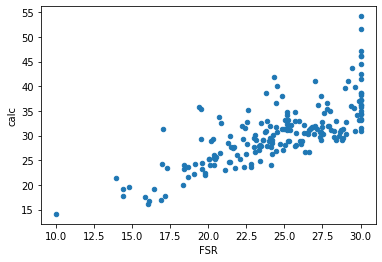

In [20]:
import matplotlib.pyplot as plt
df.plot.scatter(y='calc',x='FSR')
plt.show()

In [10]:
corr=df['FSR'].corr(df['calc'])
print(round(corr,2))

0.75


In [80]:
df.iloc[57]

Name           National Institute of Technology Meghalaya
UG Intake                                             600
PG Intake                                             200
N_T                                                   800
Faculty                                                90
Full Time                                             108
Part Time                                              60
UG Enrolled                                           588
PG Enrolled                                           115
FSR                                                  30.0
calc                                            44.603524
Name: 57, dtype: object

In [25]:
df.iloc[56]

Name           Defence Institute of Advanced Technology
UG Intake                                             0
PG Intake                                           796
N_T                                                 796
Faculty                                              83
Full Time                                            60
Part Time                                            85
UG Enrolled                                           0
PG Enrolled                                         439
FSR                                               29.44
calc                                           0.096963
Name: 56, dtype: object

In [65]:
df.iloc[55]

Name           Visvesvaraya Technological University
UG Intake                                          0
PG Intake                                       1670
N_T                                             1670
Faculty                                          145
Full Time                                         36
Part Time                                        217
UG Enrolled                                        0
PG Enrolled                                     1433
FSR                                             30.0
calc                                       60.416667
Name: 55, dtype: object